In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

In [2]:
import math
import random

G = -9.8

def transit_time(*, x: float, y: float, v0: float, a: float) -> float:
    l = math.sqrt(x * x + y * y)
    if y == 0:
        return l / v0
    return (math.sqrt(v0 * v0 + 2 * a * y) - v0) * l / (a * y)


class Curve:
    def __init__(self, *, num_points: int, width: float, height: float) -> None:
        r = random.Random()
        self._xs = [width * i / num_points for i in range(num_points + 1)]
        self._ys = [height, *(r.random() * height / 2 for i in range(num_points-1)), 0]
        self._ts = [0, *(math.inf for i in range(num_points))]
        self._height = height

    def _velocity(self, y: float) -> float:
        return math.sqrt(2 * G * (y - self._height))


    def perturb(self, idx: int, dy: float, force: bool) -> None:
        if idx == 0 or idx >= (len(self._xs) - 1):
            raise ValueError("")
        x0 = self._xs[idx-1]
        x1 = self._xs[idx]
        x2 = self._xs[idx + 1]
        y0 = self._ys[idx-1]
        y1 = min(self._ys[idx] + dy, self._height - 0.01)
        y2 = self._ys[idx + 1]

        t0 = transit_time(
            x=(x1 - x0),
            y=(y1 - y0),
            v0=self._velocity(y0),
            a=G,
        )

        t1 = transit_time(
            x=(x2 - x1),
            y=(y2 - y1),
            v0=self._velocity(y1),
            a=G,
        )

        if force or ((t0 + t1) < self._ts[idx] + self._ts[idx+1]):
            self._ts[idx] = t0
            self._ts[idx+1] = t1

            self._ys[idx] = y1

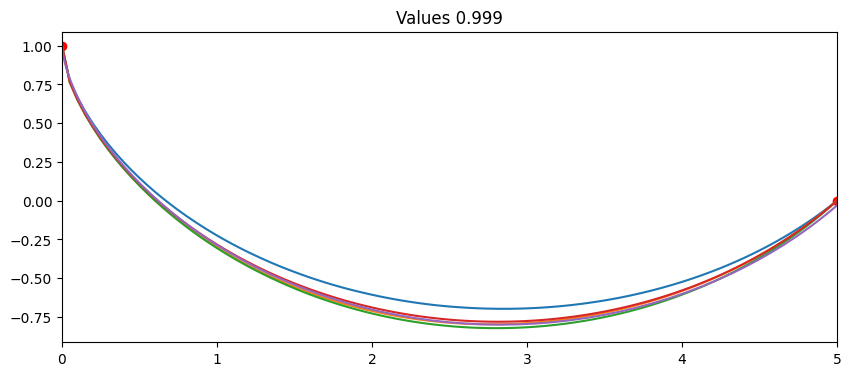

In [4]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.title("Graph of Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)



W = 5
H = 1

n = 100


# Regular interval for x-axis (assuming equal spacing)
x = np.arange(n + 1)/n * W


d = H/10
curve = Curve(num_points=n, width=W, height=H)
curve2 = Curve(num_points=n, width=W, height=H)
curve3 = Curve(num_points=n, width=W, height=H)
curve4 = Curve(num_points=n, width=W, height=H)
rand = random.Random(1239832)

theta = np.linspace(0, 2 * 3.1415, n + 1)

# Parametric equations
r = 0.9
xb = r * (theta - np.sin(theta)) + 0
yb = -r * (1 - np.cos(theta)) + H

N = 10000000
for i in range(N):
    r = d * (N - i) / N
#     r = r * r
    dy = rand.random() * r - r/2
    heat = 0
    if i < .75 * N:
        heat = (N - i) / N
#         heat = heat * heat
        heat = heat / 2
    curve.perturb(idx=rand.randint(1, n - 1), dy=dy, force=rand.random() < 0)
    curve2.perturb(idx=rand.randint(1, n - 1), dy=dy, force=rand.random() < heat)
    curve3.perturb(idx=rand.randint(1, n - 1), dy=dy, force=rand.random() < heat/5)
    curve4.perturb(idx=rand.randint(1, n - 1), dy=dy, force=rand.random() < heat/10)
    if i % 10000 == 0:
        clear_output(wait=True)
        plt.figure(figsize=(10, 6))
        plt.title(f"Values {i/N}")
        plt.plot(x, curve._ys)
        plt.plot(x, curve2._ys)
        plt.plot(x, curve3._ys)
        plt.plot(x, curve4._ys)
        plt.plot(xb, yb)

        plt.scatter([0, W], [H, 0], color='red')  # Start and end points

        
        # Set the limits of the plot
        plt.xlim(0, W)
#         plt.ylim(-H, H)
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        # Don't mess with the limits!
        plt.autoscale(False)
        plt.show()
# x = np.arange(len(values)/n)
# plt.plot(x, values, marker='o')
# plt.show()



# # import numpy as np
# # import matplotlib.pyplot as plt
# from scipy.optimize import minimize

# def plot_brachistochrone(start, end):
#     # Function to minimize
#     def to_minimize(r):
#         try:
#             theta_end = np.arccos(1 - (end[1] - start[1]) / r) * 2
#             x_end = r * (theta_end - np.sin(theta_end)) + start[0]
#             return (x_end - end[0])**2
#         except ValueError:
#             # Return a large number if r is not feasible
#             return 1e6

#     # Initial guess for r and bounds
#     initial_guess = [1]
#     bounds = [(0.01, None)]

#     # Find the optimal r
# #     res = minimize(to_minimize, initial_guess, bounds=bounds)
#     r = .90 # res.x[0]

#     # Determine the range of theta
#     theta_end = 10 # np.arccos(1 - (end[1] - start[1]) / r) * 2
#     theta = np.linspace(0, theta_end, 1000)

#     # Parametric equations
#     x = r * (theta - np.sin(theta)) + start[0]
#     y = -r * (1 - np.cos(theta)) + start[1]

#     # Plotting
# #     plt.figure(figsize=(10, 6))
#     plt.plot(x, y)
#     plt.scatter([start[0], end[0]], [start[1], end[1]], color='red')  # Start and end points
#     plt.title("Brachistochrone Curve")
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.grid(True)
#     plt.axis('equal')
#     plt.show()

# # Example usage
# plot_brachistochrone((0, 1), (5, 0))
